In [39]:
import cirq
import qtree
import matplotlib
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example usage

In [40]:
def get_test_circ_filename(root, size, depth=10, id_=0):
    grid = f'{size}x{size}'
    return f'{root}/inst/cz_v2/{grid}/inst_{grid}_{depth}_{id_}.txt'

test_file = get_test_circ_filename('./qtree/test_circuits', 4)
test_file

'./qtree/test_circuits/inst/cz_v2/4x4/inst_4x4_10_0.txt'

## Read circuit and build graph

In [41]:
nqubits, circ = qtree.read_circuit_file(test_file)
for layer in circ:
    print(layer)

2020-02-24 19:29:10,283- INFO•	reading file ./qtree/test_circuits/inst/cz_v2/4x4/inst_4x4_10_0.txt
2020-02-24 19:29:10,284- INFO•	There are 16 qubits in circuit


[H(0), H(1), H(2), H(3), H(4), H(5), H(6), H(7), H(8), H(9), H(10), H(11), H(12), H(13), H(14), H(15)]
[cZ(0,1), cZ(6,7), cZ(8,9), cZ(14,15), T(2), T(3), T(4), T(5), T(10), T(11), T(12), T(13)]
[cZ(4,8), cZ(6,10), Y_1_2(0), Y_1_2(1), X_1_2(7), X_1_2(9), Y_1_2(14), X_1_2(15)]
[cZ(1,2), cZ(9,10), T(0), Y_1_2(4), X_1_2(6), T(7), X_1_2(8), T(14), T(15)]
[cZ(0,4), cZ(9,13), cZ(2,6), cZ(11,15), Y_1_2(1), T(8), Y_1_2(10)]
[cZ(2,3), cZ(4,5), cZ(10,11), cZ(12,13), Y_1_2(0), T(1), X_1_2(6), Y_1_2(9), Y_1_2(15)]
[cZ(5,9), cZ(7,11), T(0), X_1_2(2), Y_1_2(3), Y_1_2(4), T(6), Y_1_2(10), Y_1_2(12), X_1_2(13), T(15)]
[cZ(5,6), cZ(13,14), T(2), T(3), T(4), Y_1_2(7), Y_1_2(9), T(10), Y_1_2(11), T(12)]
[cZ(8,12), cZ(1,5), cZ(10,14), cZ(3,7), X_1_2(6), T(9), T(11), X_1_2(13)]
[cZ(0,1), cZ(6,7), cZ(8,9), cZ(14,15), X_1_2(3), Y_1_2(5), Y_1_2(10), Y_1_2(12), T(13)]
[H(0), H(1), H(2), H(3), H(4), H(5), H(6), H(7), H(8), H(9), H(10), H(11), H(12), H(13), H(14), H(15)]


2020-02-24 18:53:29,316- INFO•	Generated graph with 78 nodes and 115 edges
/usr/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


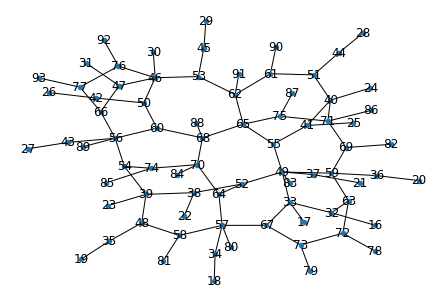

In [4]:
graph = qtree.graph_model.circ2graph(nqubits, circ)
nx.draw_kamada_kawai(graph, node_size=20, with_labels=True)

### Generate buckets

In [5]:
buckets, data_dict, bra, ket = \
    qtree.optimizer.circ2buckets(nqubits, circ)
print(bra, ket)

[o_0, o_1, o_2, o_3, o_4, o_5, o_6, o_7, o_8, o_9, o_10, o_11, o_12, o_13, o_14, o_15] [i_0, i_1, i_2, i_3, i_4, i_5, i_6, i_7, i_8, i_9, i_10, i_11, i_12, i_13, i_14, i_15]


### Get graph from buckets, make clique on output vars

In [6]:
graph_initial = qtree.graph_model.buckets2graph(
    buckets, ignore_variables=ket)

graph_full = qtree.graph_model.make_clique_on(graph_initial, bra)

2020-02-24 18:53:30,844- INFO•	Clique of size 16 on vertices: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)


<IPython.core.display.Javascript object>


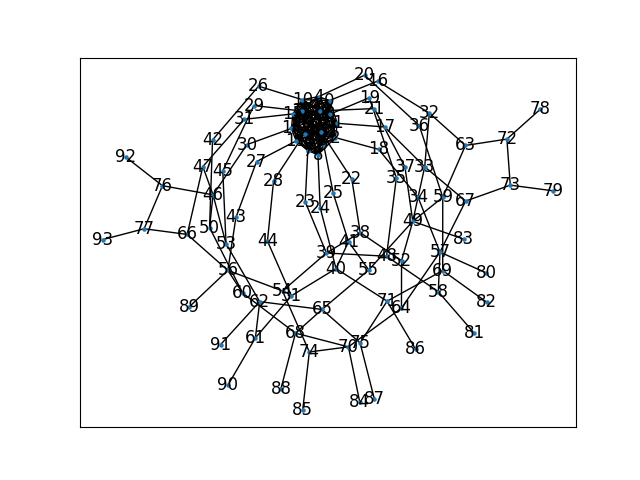

In [7]:
%matplotlib notebook 

def draw_graph(graph):
    layout = nx.kamada_kawai_layout(graph)
    nx.draw_networkx_nodes(graph, layout, node_size=5)
    nx.draw_networkx_edges(graph, layout)
    nx.draw_networkx_labels(graph, layout)
    
draw_graph(graph_full)

/usr/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


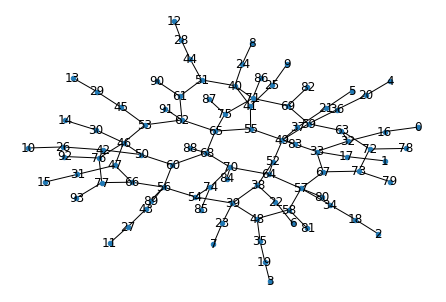

In [8]:
%matplotlib inline

2020-02-24 17:40:11,991- INFO•	generating config file output/quickbb.15781565.cnf
2020-02-24 17:40:11,997- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.15781565.cnf 


### Get optimal peo with clique in the end

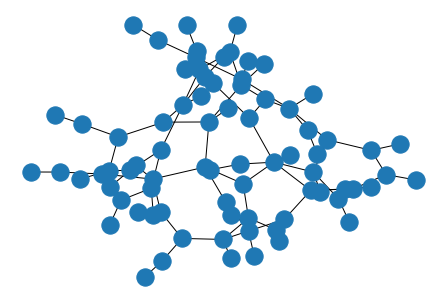

In [15]:

qtree.simulator.eval_contraction_cost(test_file)

2020-02-24 19:05:41,953- INFO•	reading file ./qtree/test_circuits/inst/cz_v2/4x4/inst_4x4_10_0.txt
2020-02-24 19:05:41,955- INFO•	There are 16 qubits in circuit
2020-02-24 19:05:42,089- INFO•	generating config file output/quickbb.59342320.cnf
2020-02-24 19:05:42,090- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.59342320.cnf 
2020-02-24 19:05:42,210- INFO•	Removed indices by parallelization:
[49, 46, 57, 56, 33]
2020-02-24 19:05:42,212- INFO•	Removed 5 variables
2020-02-24 19:05:42,220- INFO•	generating config file output/quickbb.94711220.cnf
2020-02-24 19:05:42,221- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.94711220.cnf 


Memory (in doubles):
 raw: 3.706e+06
 optimized: 2.268e+04
 parallel:
  node: 1.709e+04 total: 5.468e+05 n_tasks: 32


In [113]:
peo, tw = qtree.graph_model.get_peo(graph_full)
new_peo = qtree.graph_model.get_equivalent_peo(graph_full, peo, bra)
print(tw, new_peo)

2020-02-24 18:46:21,745- INFO•	generating config file output/quickbb.93877840.cnf
2020-02-24 18:46:21,746- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.93877840.cnf 


16 [v_80, v_83, v_84, v_89, v_91, v_88, v_86, v_81, v_85, v_93, v_92, v_87, v_82, v_90, v_79, v_78, v_24, v_30, v_18, v_34, v_21, v_37, v_23, v_27, v_43, v_20, v_36, v_17, v_25, v_72, v_73, v_16, v_28, v_44, v_61, v_29, v_45, v_22, v_26, v_42, v_69, v_75, v_76, v_77, v_31, v_74, v_19, v_35, v_58, v_48, v_54, v_47, v_66, v_71, v_50, v_68, v_38, v_64, v_53, v_51, v_32, v_67, v_55, v_41, v_63, v_62, v_52, v_60, v_33, v_59, v_56, v_70, v_39, v_49, v_57, v_65, v_46, v_40, o_0, o_1, o_2, o_3, o_4, o_5, o_6, o_7, o_8, o_9, o_10, o_11, o_12, o_13, o_14, o_15]


## Cost estimation

In [73]:
def get_graph_from_file(test_file):
    nqubits, circ = qtree.read_circuit_file(test_file)
    graph = qtree.graph_model.circ2graph(nqubits, circ)

    ### Generate buckets
    buckets, data_dict, bra, ket = \
        qtree.optimizer.circ2buckets(nqubits, circ)

    ### Get graph from buckets, make clique on output vars

    graph_initial = qtree.graph_model.buckets2graph(
        buckets, ignore_variables=ket)

    graph_full = qtree.graph_model.make_clique_on(graph_initial, bra)

    ### Get optimal peo with clique in the end
    return graph_full

def generate_peo(graph_full):
    peo, tw = qtree.graph_model.get_peo(graph_full)
    new_peo = qtree.graph_model.get_equivalent_peo(graph_full, peo, bra)
    return new_peo, tw

def optimize_graph(graph_raw):
    peo, tw = generate_peo(graph_raw)
    print(tw, 'peo:', peo)
    graph, label_dict = qtree.graph_model.relabel_graph_nodes(
        graph_raw, dict(zip(peo, sorted(graph_raw.nodes(), key=int)))
    )
    return graph

In [92]:
test_file = get_test_circ_filename('./qtree/test_circuits/', 6, 10)
qtree.simulator.eval_contraction_cost(test_file)

2020-02-24 20:05:57,275- INFO•	reading file ./qtree/test_circuits//inst/cz_v2/6x6/inst_6x6_10_0.txt
2020-02-24 20:05:57,276- INFO•	There are 36 qubits in circuit
2020-02-24 20:05:57,877- INFO•	generating config file output/quickbb.30392137.cnf
2020-02-24 20:05:57,879- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.30392137.cnf 


treewidth 7


2020-02-24 20:06:57,378- INFO•	Removed indices by parallelization:
[92, 109, 134, 119, 130]
2020-02-24 20:06:57,379- INFO•	Removed 5 variables
2020-02-24 20:06:57,398- INFO•	generating config file output/quickbb.65821972.cnf
2020-02-24 20:06:57,399- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.65821972.cnf 


Memory (in doubles):
 raw: 7.907e+12
 optimized: 1.222e+05
 parallel:
  node: 1.007e+05 total: 3.222e+06 n_tasks: 32


In [93]:
def plot_cost(mems, flops):
    plt.yscale('log')
    ax = plt.gca()
    ax.grid(which='minor', alpha=0.5, linestyle='-', axis='both')
    ax.grid(which='major', alpha=0.6, axis='both')
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.minorticks_on()
    
    plt.plot(mems, label='Memory')
    plt.plot(flops, label='FLOP')
    plt.legend()
    
def cost_graph(graph_full, title):
    mems, flops = qtree.graph_model.cost_estimator(graph_full)
    plt.title(title)
    plot_cost(mems, flops)
    print(title, '{:.3e}'.format(sum(flops)))

2020-02-24 20:07:57,433- INFO•	reading file ./qtree/test_circuits//inst/cz_v2/6x6/inst_6x6_10_0.txt
2020-02-24 20:07:57,435- INFO•	There are 36 qubits in circuit
2020-02-24 20:07:57,448- INFO•	Generated graph with 178 nodes and 264 edges
2020-02-24 20:07:57,470- INFO•	Clique of size 36 on vertices: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35)
2020-02-24 20:07:58,524- INFO•	generating config file output/quickbb.96687577.cnf
2020-02-24 20:07:58,525- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.96687577.cnf 


full state, naive 6.734e+15
36 peo: [v_199, v_188, v_204, v_185, v_180, v_212, v_193, v_186, v_203, v_207, v_208, v_196, v_194, v_189, v_192, v_190, v_205, v_191, v_184, v_213, v_179, v_178, v_210, v_211, v_206, v_182, v_183, v_202, v_195, v_187, v_209, v_201, v_200, v_197, v_181, v_198, v_173, v_48, v_59, v_95, v_56, v_52, v_39, v_75, v_46, v_82, v_67, v_103, v_62, v_98, v_43, v_79, v_38, v_74, v_132, v_70, v_106, v_51, v_87, v_45, v_63, v_99, v_162, v_42, v_78, v_41, v_69, v_65, v_37, v_61, v_155, v_163, v_47, v_83, v_66, v_102, v_140, v_54, v_90, v_49, v_170, v_172, v_174, v_169, v_168, v_40, v_175, v_177, v_176, v_166, v_167, v_36, v_58, v_94, v_50, v_86, v_44, v_60, v_68, v_71, v_107, v_142, v_64, v_158, v_171, v_53, v_164, v_55, v_91, v_57, v_93, v_120, v_138, v_89, v_160, v_100, v_116, v_104, v_96, v_80, v_145, v_111, v_154, v_113, v_72, v_152, v_151, v_150, v_76, v_144, v_124, v_149, v_161, v_153, v_127, v_125, v_85, v_112, v_123, v_147, v_139, v_110, v_117, v_165, v_157, v_143

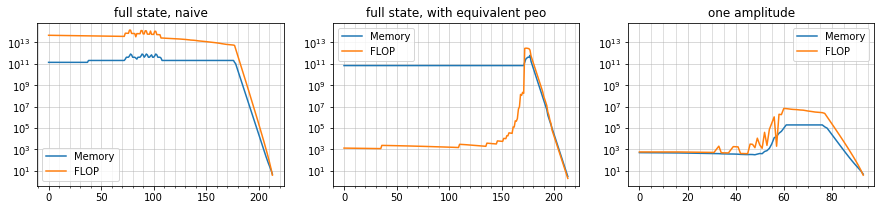

In [94]:
f, axs = plt.subplots(1,3, sharey=True, figsize=(15,3))
graph_full = get_graph_from_file(test_file)             

plt.sca(axs[0])
cost_graph(graph_full, 'full state, naive')
graph_full = optimize_graph(graph_full)

plt.sca(axs[1])
cost_graph(graph_full, 'full state, with equivalent peo')

plt.sca(axs[2])
cost_graph(graph_initial, 'one amplitude')

# QAOA usage

## Generate circuit